In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
from glob import glob
from skimage.color import rgb2gray

In [3]:
train_files = np.array(glob("train/*/*"))

In [4]:
len(train_files)

2009

In [5]:
train_files[0]

'train\\DME\\DME-119840-1.jpeg'

In [6]:
img = cv2.imread(train_files[0])

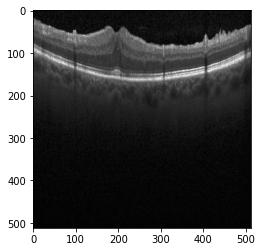

In [7]:
plt.imshow(img)

In [8]:
# apply gray scale filter
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

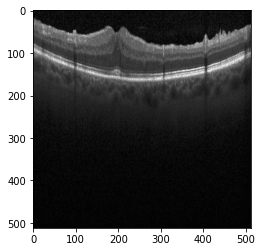

In [9]:
plt.imshow(gray,cmap='gray')

In [10]:
# apply threshold filter
thresh, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

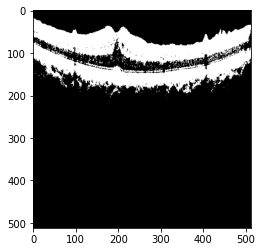

In [11]:
plt.imshow(binary,cmap='gray')

In [12]:
# initialize a kernel and apply morphology filter

kernel = np.ones((2, 2), np.uint8)

morphology = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

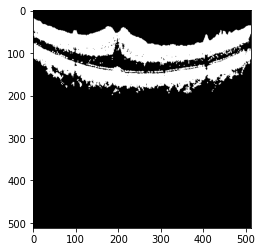

In [13]:
plt.imshow(morphology,cmap='gray')

In [14]:
# find and contour blobs

contours, hierarchy = cv2.findContours(morphology, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

contoured = img.copy()

cv2.drawContours(contoured, contours, -1, (0, 255, 0), 3)

array([[[ 1,  1,  1],
        [26, 26, 26],
        [ 1,  1,  1],
        ...,
        [ 0,  0,  0],
        [ 5,  5,  5],
        [12, 12, 12]],

       [[ 2,  2,  2],
        [16, 16, 16],
        [ 7,  7,  7],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [10, 10, 10]],

       [[ 8,  8,  8],
        [19, 19, 19],
        [14, 14, 14],
        ...,
        [ 5,  5,  5],
        [ 1,  1,  1],
        [ 3,  3,  3]],

       ...,

       [[ 2,  2,  2],
        [ 1,  1,  1],
        [ 5,  5,  5],
        ...,
        [ 5,  5,  5],
        [ 3,  3,  3],
        [ 0,  0,  0]],

       [[ 2,  2,  2],
        [ 0,  0,  0],
        [ 4,  4,  4],
        ...,
        [ 2,  2,  2],
        [ 1,  1,  1],
        [ 0,  0,  0]],

       [[ 3,  3,  3],
        [ 0,  0,  0],
        [ 2,  2,  2],
        ...,
        [ 0,  0,  0],
        [ 1,  1,  1],
        [ 2,  2,  2]]], dtype=uint8)

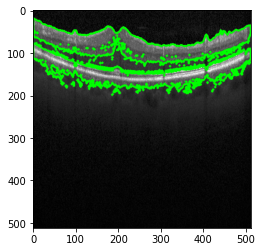

In [15]:
plt.imshow(contoured )

In [16]:
# crop the empty boundaries from the extracted biggest blob image

biggest_blob = sorted(contours, key=cv2.contourArea, reverse=True)

for c in biggest_blob:
    x,y,w,h = cv2.boundingRect(c)
    result = morphology[y:y+h, x:x+w]
    break

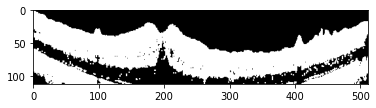

In [17]:
plt.imshow(result, cmap='gray')

In [18]:
# Width and heigth the image
height, width = result.shape

In [19]:
# Sum the value lines 
vertical_px = np.sum(result, axis=0)

In [20]:
normalize=vertical_px/255

In [22]:
# create a black image with zeros 
blankImage = np.zeros_like(result)

In [23]:
# Make the vertical projection histogram
for idx, value in enumerate(normalize):
    cv2.line(blankImage, (idx, 0), (idx, height-int(value)), (255,255,255), 1)

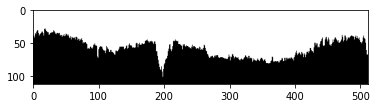

In [24]:
plt.imshow(blankImage,cmap='gray')

In [26]:
# Concatenate the image
img_concate = cv2.vconcat(
    [img,  cv2.cvtColor(blankImage, cv2.COLOR_BGR2RGB)])

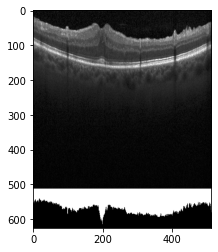

In [27]:
plt.imshow(img_concate)
plt.show()